In this study, we took a data set with the Stack Overflow Annual Developer Survey and focused on trends and insights related to Python programming.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/survey_results_public.csv'
df = pd.read_csv(file_path)

print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
df.columns[0:50]

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith',
       'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal u

1. How many respondents completed the survey?

In [7]:
num_respondents = df.shape[0]
print(f"Кількість респондентів: {num_respondents}")


Кількість респондентів: 65437



2. How many respondents answered all questions?

In [8]:
num_complete_responses = df[df.notnull().all(axis=1)].shape[0]
print(f"Кількість респондентів, які відповіли на всі запитання: {num_complete_responses}")


Кількість респондентів, які відповіли на всі запитання: 0


3. What are the values ​​of the measure of central tendency for the respondents' experience

In [9]:
# Перевірка наявності пропусків у колонці WorkExp
print(df['WorkExp'].isnull().sum())

# Перетворення даних на числові значення, якщо потрібно
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Міра центральної тенденції
mean_exp = df['WorkExp'].mean()
median_exp = df['WorkExp'].median()
mode_exp = df['WorkExp'].mode()[0]

print(f"Середнє значення: {mean_exp}")
print(f"Медіана: {median_exp}")
print(f"Мода: {mode_exp}")


35779
Середнє значення: 11.46695663901814
Медіана: 9.0
Мода: 3.0



4. How many respondents work remotely?

In [10]:
remote_workers = df[df['RemoteWork'] == 'Remote'].shape[0]
print(f"Кількість респондентів, які працюють віддалено: {remote_workers}")


Кількість респондентів, які працюють віддалено: 20831


5. What percentage of respondents program in Python?

In [11]:
python_users = df[df['LanguageHaveWorkedWith'].str.contains('Python', na=False)].shape[0]

percentage_python_users = (python_users / num_respondents) * 100

print(f"Відсоток респондентів, які програмують на Python: {percentage_python_users:.2f}%")


Відсоток респондентів, які програмують на Python: 47.06%


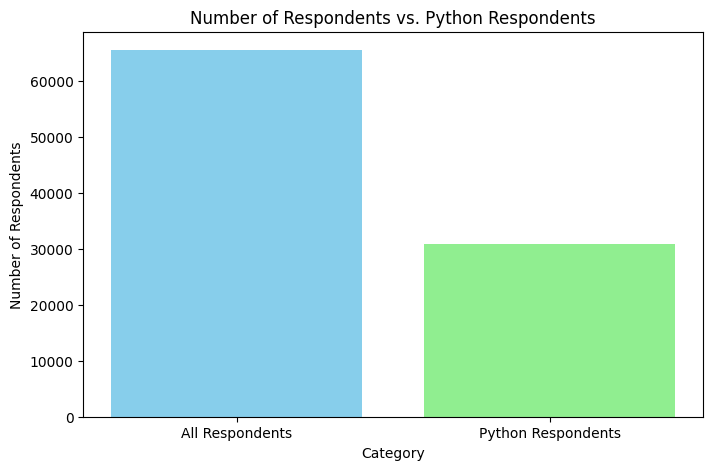

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(["All Respondents", "Python Respondents"], [num_respondents, python_users], color=['skyblue', 'lightgreen'])
plt.title("Number of Respondents vs. Python Respondents")
plt.xlabel("Category")
plt.ylabel("Number of Respondents")
plt.show()



6. How many respondents learned to program using online courses?

In [13]:
online_learners = df[df['LearnCodeOnline'].str.contains('online courses', na=False, case=False)].shape[0]

print(f"Кількість респондентів, які навчалися програмувати за допомогою онлайн курсів: {online_learners}")


Кількість респондентів, які навчалися програмувати за допомогою онлайн курсів: 30549


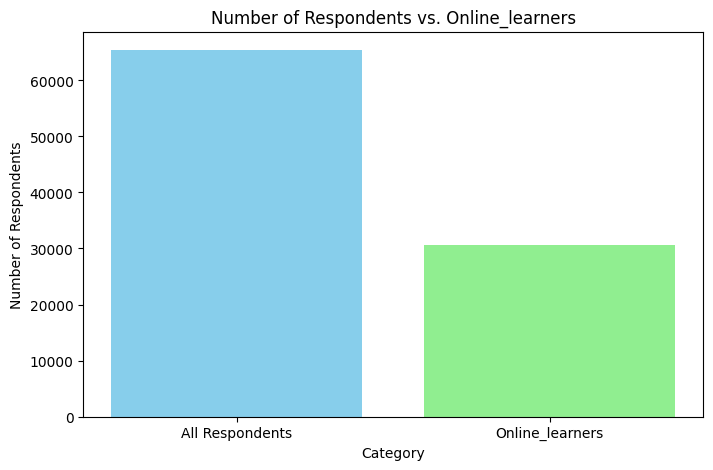

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(["All Respondents", "Online_learners"], [num_respondents, online_learners], color=['skyblue', 'lightgreen'])
plt.title("Number of Respondents vs. Online_learners")
plt.xlabel("Category")
plt.ylabel("Number of Respondents")
plt.show()

7. Among the respondents who program in Python, grouped by country, what is the average and median amount of compensation (ConvertedCompYearly) in each country?

In [14]:
# Фільтрація респондентів, які програмують на Python
python_users = df[df['LanguageHaveWorkedWith'].str.contains('Python', na=False)]

# Групування за країною і обчислення середньої та медіанної компенсації
grouped_compensation = python_users.groupby('Country')['ConvertedCompYearly'].agg(['mean', 'median']).reset_index()

# Виведення результату
print(grouped_compensation)

                                  Country           mean    median
0                             Afghanistan    4543.000000    4768.5
1                                 Albania   56295.000000   56295.0
2                                 Algeria    9053.285714    6230.0
3                                 Andorra  193331.000000  193331.0
4                                  Angola       6.000000       6.0
..                                    ...            ...       ...
168  Venezuela, Bolivarian Republic of...   21500.000000    7100.0
169                              Viet Nam   14014.562500   10180.0
170                                 Yemen   10297.333333    5333.0
171                                Zambia   28123.666667   22803.0
172                              Zimbabwe   37500.000000   18000.0

[173 rows x 3 columns]


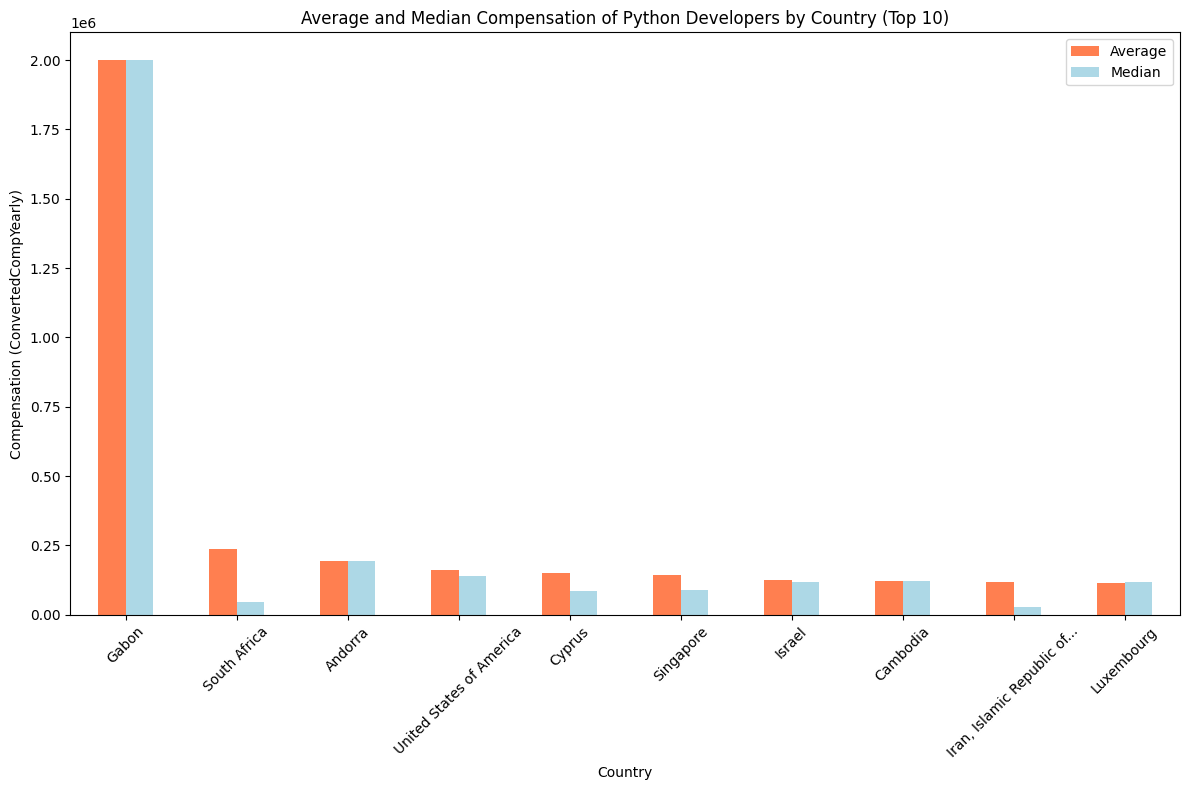

In [19]:
# Sort by mean compensation and select top 10 countries
top_countries = grouped_compensation.sort_values(by="mean", ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
top_countries.plot(kind='bar', x='Country', y=['mean', 'median'], ax=ax, color=['coral', 'lightblue'])

# Adding labels and title
ax.set_title("Average and Median Compensation of Python Developers by Country (Top 10)")
ax.set_xlabel("Country")
ax.set_ylabel("Compensation (ConvertedCompYearly)")
ax.legend(["Average", "Median"], loc="upper right")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. What are the education levels of the 5 respondents with the highest compensation?

In [15]:
# Сортування DataFrame за компенсацією у спадаючому порядку і вибір перших 5 респондентів
top_5_respondents = df.nlargest(5, 'ConvertedCompYearly')

# Вибір колонок з рівнем освіти та компенсацією
top_5_education = top_5_respondents[['EdLevel', 'ConvertedCompYearly']]

print(top_5_education)


                                              EdLevel  ConvertedCompYearly
15837    Bachelor’s degree (B.A., B.S., B.Eng., etc.)           16256603.0
12723  Professional degree (JD, MD, Ph.D, Ed.D, etc.)           13818022.0
28379  Professional degree (JD, MD, Ph.D, Ed.D, etc.)            9000000.0
17593    Bachelor’s degree (B.A., B.S., B.Eng., etc.)            6340564.0
17672  Professional degree (JD, MD, Ph.D, Ed.D, etc.)            4936778.0



9. In each age category, what percentage of respondents program in Python?

In [16]:
# Додати колонку для відмітки, хто програмує на Python
df['PythonUser'] = df['LanguageHaveWorkedWith'].str.contains('Python', na=False)

# Групування за віковою категорією та підрахунок відсотків
age_group_percentage = df.groupby('Age').agg(
    Total=('PythonUser', 'size'),  # Загальна кількість респондентів у групі
    PythonCount=('PythonUser', 'sum')  # Кількість респондентів, які програмують на Python
).reset_index()

# Обчислення відсотка
age_group_percentage['Percentage'] = (age_group_percentage['PythonCount'] / age_group_percentage['Total']) * 100

print(age_group_percentage[['Age', 'Percentage']])



                  Age  Percentage
0     18-24 years old   55.922826
1     25-34 years old   45.773912
2     35-44 years old   41.520546
3     45-54 years old   41.910706
4     55-64 years old   40.427184
5   65 years or older   37.564767
6   Prefer not to say   45.341615
7  Under 18 years old   64.875389


10. Among respondents who are in the 75th percentile for average compensation and work remotely, which industries are most common?

In [17]:
# Обчислення 75-го перцентиля для компенсації
percentile_75 = df['ConvertedCompYearly'].quantile(0.75)

# Фільтрація респондентів, які працюють віддалено і знаходяться в 75-му перцентилі
high_income_remote_workers = df[(df['ConvertedCompYearly'] > percentile_75) & (df['RemoteWork'] == 'Remote')]

# Підрахунок найбільш поширених індустрій
industry_distribution = high_income_remote_workers['Industry'].value_counts().reset_index()
industry_distribution.columns = ['Industry', 'Count']

print(industry_distribution)


                                      Industry  Count
0                         Software Development    768
1                                       Other:    239
2                                   Healthcare    156
3                                      Fintech    156
4   Internet, Telecomm or Information Services    145
5                 Retail and Consumer Services    106
6                 Media & Advertising Services    103
7                   Banking/Financial Services     69
8                                   Government     69
9         Computer Systems Design and Services     69
10             Transportation, or Supply Chain     67
11                                   Insurance     50
12                               Manufacturing     48
13                            Higher Education     42
14                                      Energy     36
